## K Means Clustering Algorithms Implementation

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###  Generating Sample Data

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=31)

In [3]:
X

array([[-4.10785368,  7.82699681],
       [-5.66810193, -8.43336082],
       [-3.991989  ,  9.4237974 ],
       ...,
       [-4.34556376, 10.08902531],
       [-4.18541548, 10.94587087],
       [-6.60092444, -6.81458897]])

In [4]:
y

array([0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0,
       2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1,
       1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1,
       2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 0,
       2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0,
       0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0,

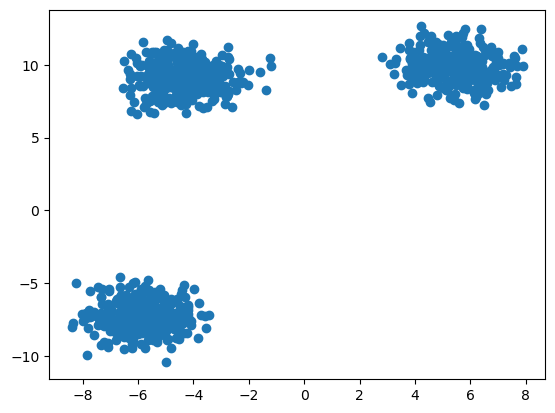

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.cluster import KMeans

### Elbow method to select K Value

##### Elbow Method: 
             Use the Elbow Method to find the optimal number of clusters. It helps identfy  the    "elbow" point on the graph, which indicates a good balance between capturing distinct groups and avoiding overfitting.

In [11]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[58726.87127207889,
 11981.160969310498,
 1334.9748355260117,
 1166.8473758982234,
 1005.9965088213369,
 852.4550155471392,
 744.9506514468148,
 655.8938415902372,
 577.9949038566247,
 538.1854827693443]

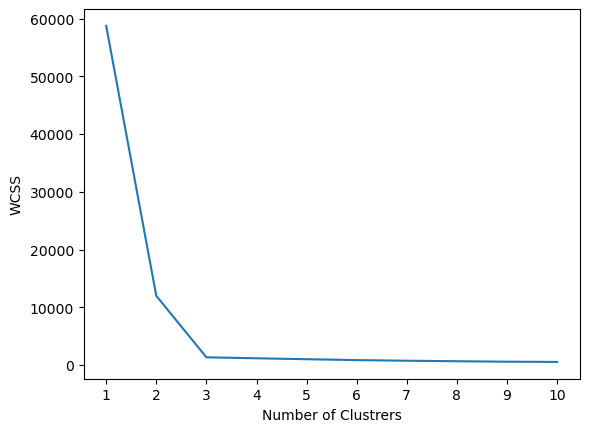

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
y_labels=kmeans.fit_predict(X_train)

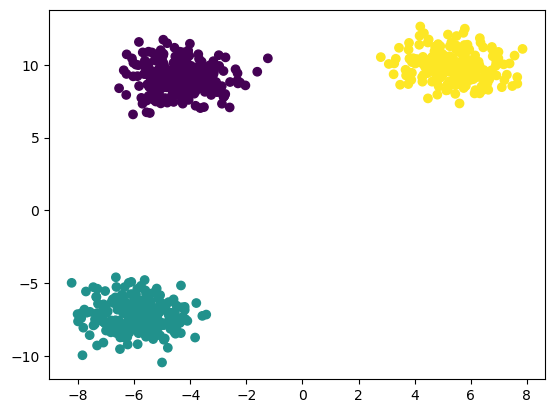

In [16]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [19]:
## knee locator --> for large data sometime we are not able to identify the k value
#!pip install kneed

In [20]:
from kneed import KneeLocator

In [21]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

### Silhoutte score

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients

[0.7534426451870487,
 0.8415557670907301,
 0.6635088979758703,
 0.48309975032100155,
 0.3265030046555994,
 0.3342754057052887,
 0.3394203276108037,
 0.34423487816036863,
 0.3391324159944493]

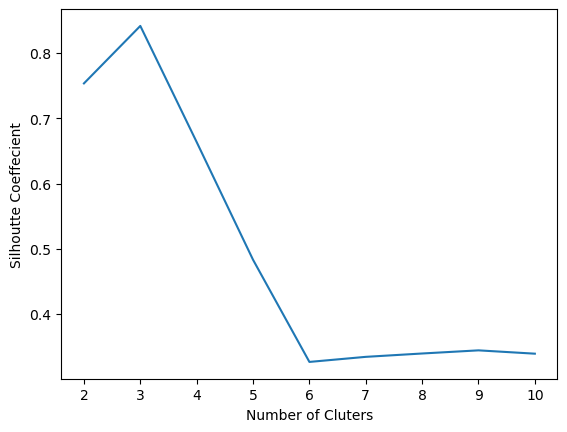

In [25]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()